<div align=center style="direction:rtl">
    <font face="XB Niloofar", size=5>
        به نام خدا
        <br/>
        <br/>
        دانشگاه صنعتی شریف- دانشکده برق
        <br />
        <br/>
        استنتاج علّی
        <br/>
        <br/>
        دکتر صالح
        <br />
        <br/>
        سجاد رحمانیان
    </font>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hyppo.independence import Hsic
%matplotlib inline

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol>
            <li>
    تولید و تصویر داده های علّی
            </li>
        </ol>
     </font>
</div>

In [2]:
def visualizer(pnx, pny, model, n, xgiven, ygiven, e, dox, doy, c = "blue"):
    '''
        pnx: The distribution of Nx
        pny: The distribution of Ny
        model: A or B
        n: Number of data you want to generate
        xgiven: Conditioning on X
        ygiven: Conditioning on Y
        e: The precision factor(x = a if a - e < x < a + e)
        dox: A number or a vector of length n for intervening on X
        doy: A number or a vector of length n for intervening on Y
        c: The color of plots
    '''
    
    if pnx == 'standard_normal':
        nx = np.random.normal(0, 1, n)
    elif pnx == 'standard_uniform':
        nx = np.random.uniform(0, 1, n)
    elif pnx == 'standard_t_degree=1':
        nx = np.random.standard_t(1, n)
    elif pnx == 'standard_t_degree=20':
        nx = np.random.standard_t(20, n)
    else:
        print('distribution not defined!')
        return
    
    if pny == 'standard_normal':
        ny = np.random.normal(0, 1, n)
    elif pny == 'standard_uniform':
        ny = np.random.uniform(0, 1, n)
    elif pny == 'standard_t_degree=1':
        ny = np.random.standard_t(1, n)
    elif pny == 'standard_t_degree=20':
        ny = np.random.standard_t(20, n)
    else:
        print('distribution not defined!')
        return
    
    if model == 'A':
        x = nx
        y = x ** 3 + x + ny
    elif model == 'B':
        x = nx
        y = x + ny
    else:
        print('model not defined!')
        return
    
    fig = plt.figure(figsize=(12,12))
    
    plt.subplot(4, 3, 1)
    sns.scatterplot(x=x, y=y, color=c)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('joint distribution of X,Y')
    
    
    plt.subplot(4, 3, 2)
    sns.distplot(x, hist=False, kde=True, 
                 bins=int(180/5), color = c,
                 hist_kws={'edgecolor':'black'})
    plt.xlabel('$x$')
    plt.ylabel('$p_X(x)$')
    plt.title('marginal distribution of X')
    
    
    plt.subplot(4, 3, 3)
    sns.distplot(y, hist=False, kde=True, 
                 bins=int(180/5), color = c,
                 hist_kws={'edgecolor':'black'})
    plt.xlabel('$y$')
    plt.ylabel('$p_Y(y)$')
    plt.title('marginal distribution of Y')
    
    
    for i in range(len(ygiven)):
        temp = np.ones((n, 1))
        temp[ y.reshape((n, 1)) > (ygiven[i] + e)] = 0
        temp[ y.reshape((n, 1)) < (ygiven[i] - e)] = 0
        temp = x.reshape((n, 1))[temp == 1]
        plt.subplot(4, 3, i + 4)
        sns.distplot(temp, hist=False, kde=True, 
                     bins=int(180/5), color = c,
                     hist_kws={'edgecolor':'black'})
        # Add labels
        plt.title('$p_{X|Y}(x|y =$' + str(ygiven[i]) + ")")
        plt.ylabel('$p_{X|Y}(x|y =$' + str(ygiven[i]) + ")")
        plt.xlabel('$x$')
        
        
    for i in range(len(xgiven)):
        temp = np.ones((n, 1))
        temp[x.reshape((n, 1)) > (xgiven[i] + e)] = 0
        temp[x.reshape((n, 1)) < (xgiven[i] - e)] = 0
        temp = y.reshape((n, 1))[temp == 1]
        plt.subplot(4, 3, i + 7)
        sns.distplot(temp, hist=False, kde=True, 
                     bins=int(180/5), color = c,
                     hist_kws={'edgecolor':'black'})
        # Add labels
        plt.title('$p_{Y|X}(y|x =$' + str(xgiven[i]) + ")")
        plt.ylabel('$p_{Y|X}(y|x =$' + str(xgiven[i]) + ")")
        plt.xlabel('$y$')
    
    
    X = nx.reshape((n , 1))
    Y = doy * np.ones((n, 1))
    plt.subplot(4, 3, 10)
    sns.distplot(X, hist=False, kde=True, 
                     bins=int(180/5), color = c,
                     hist_kws={'edgecolor':'black'})
    # Add labels
    plt.title("$p_X^{do(Y = "+ str(doy) + ")}(x)$")
    plt.ylabel("$p_X^{do(Y = "+ str(doy) + ")}(x)$")
    plt.xlabel('x')
    
    
    X = dox * np.ones((n, 1))
    if model == 'A':
        Y = X ** 3 + X + ny.reshape((n , 1))
    elif model == 'B':
        Y = X + ny.reshape((n , 1))
    plt.subplot(4, 3, 11)
    sns.distplot(Y, hist=False, kde=True, 
                     color = c,
                     hist_kws={'edgecolor':'black'})
    # Add labels
    plt.title("$p_Y^{do(X = "+ str(dox) + ")}(y)$")
    plt.ylabel("$p_Y^{do(X = "+ str(dox) + ")}(y)$")
    plt.xlabel('y')
    
    plt.tight_layout()
    return x, y


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol>
            <li>
    توضیح:
                <font color=#FF7500 size=4>
                همانطور که از نمودارهای توزیع شرطی پیداست، با تغییر مقدار 
                $y$
                شرط شده، نحوه ی تولید 
                $x$
                تغییر می کند که این در تناقض با اصل استقلال مکانیزم ها می باشد. بنابراین می توان گفت که در این حالت جهت علی قابل تشخیص است.
                دلیل این امر غیر خطی بودن مدل است.
                </font>
            </li>
        </ol>
     </font>
</div>

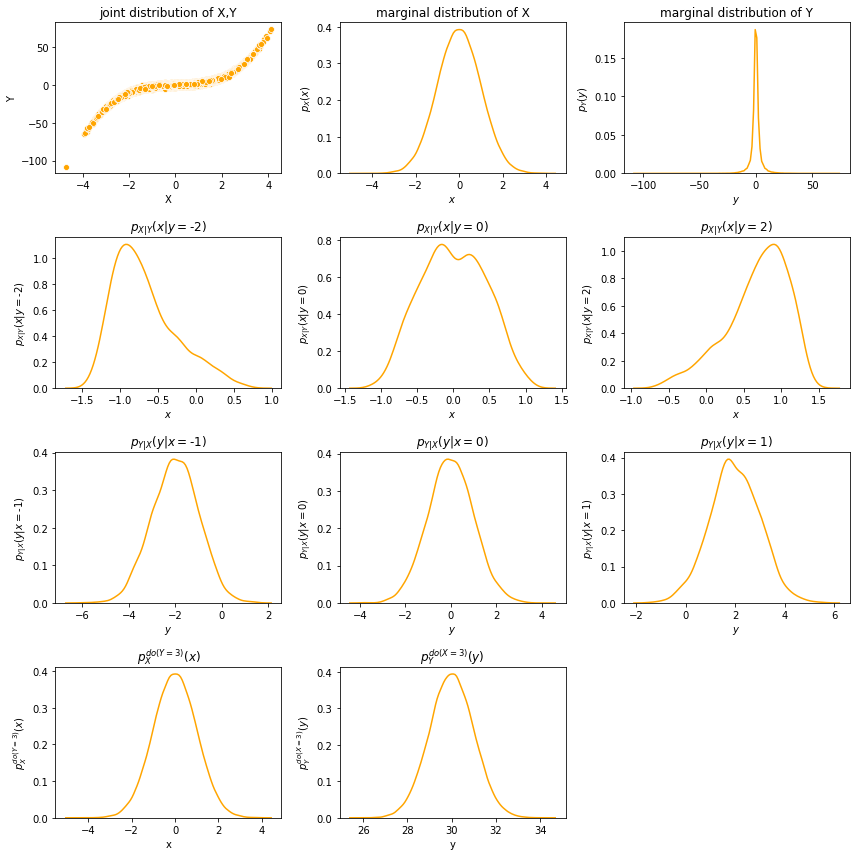

In [3]:
x1, y1= visualizer('standard_normal', 'standard_normal', 'A', 10 ** 5,[-1, 0, 1],[-2, 0, 2], 0.1, 3, 3, "orange")

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol start=2>
            <li>
    توضیح:
                <font size=4 color=#FF7500>
                      در این قسمت نیز در جهت ضدعلّی اصل استقلال مکانیزم ها نقض می شود. یک نکته دیگر که در مورد قبل نیز صادق بود این است که با مشاهده نمودار توزیع های تداخلی می توان نتیجه گرفت که تنها جهت علّی از
                    $X$
                    به
                    $Y$
                    قابل قبول است چرا که با مداخله در
                    $Y$
                    ،
                    توزیع
                    $X$
                    تغییری نمی کند ولی در جهت علّی این امر رخ می دهد؛ یعنی با مداخله در 
                    $X$
                    توزیع
                    $Y$
                    تغییر می کند و 
                    و دو متغیّر همچنان وابسته باقی می مانند.
                    علت تئوری این موضوع خطی بودن مدل است که تنها در حالتی تشخیص پذیر نیست که هر دو نویز خارجی گاوسی باشند
                    که در این مدل به این گونه نیست.
                </font>
            </li>
        </ol>
     </font>
</div>
![](dist.png)

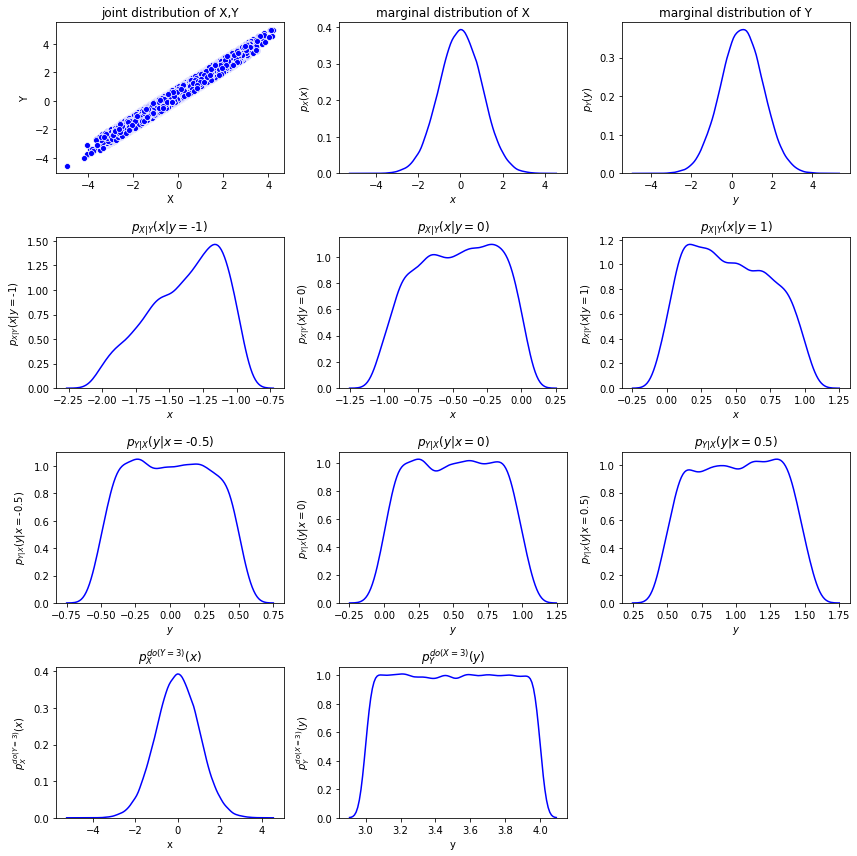

In [4]:
x2, y2 = visualizer('standard_normal', 'standard_uniform', 'B', 10 ** 5,[-0.5, 0, 0.5],[-1, 0, 1], 0.1, 3, 3, "blue")

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol start=3>
            <li>
    توضیح:
                <font color=#FF7500 size=4>
                    توضیحات دقیقا به مانند قسمت قبل می باشد.
            </li>
        </ol>
     </font>
</div>

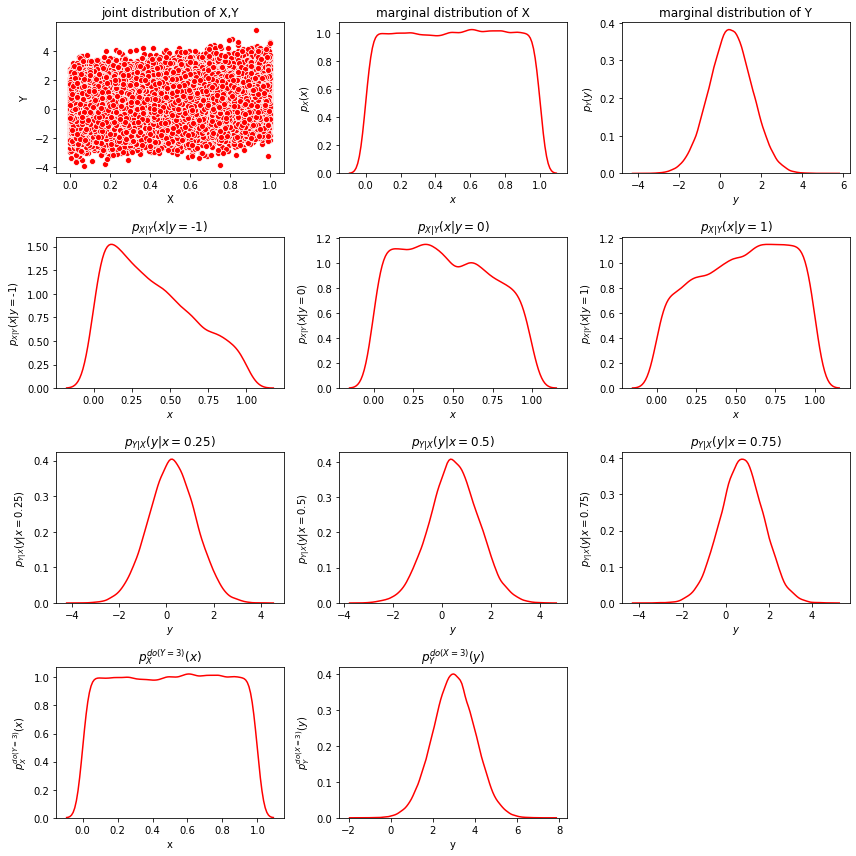

In [5]:
x3, y3 = visualizer('standard_uniform', 'standard_normal', 'B', 10 ** 5,[0.25, 0.5, 0.75],[-1, 0, 1], 0.1, 3, 3, "red")

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol start=4>
            <li>
    توضیح:
                <font color=#FF7500 size=4>
                    در این قسمت به دلیلی که بعد از قسمت ۵ توضیح داده شده است دیگر نمی توان با قاطعیت از اصل استقلال مکانیزم ها جهت علی را تشخیص داد. اما چیزی که همچنان ما را یاری می کند توزیع های تداخلی است که با استناد به آن ها می توان گفت جهت علّی قابل تشخیص است.
                </font>
            </li>
        </ol>
     </font>
</div>

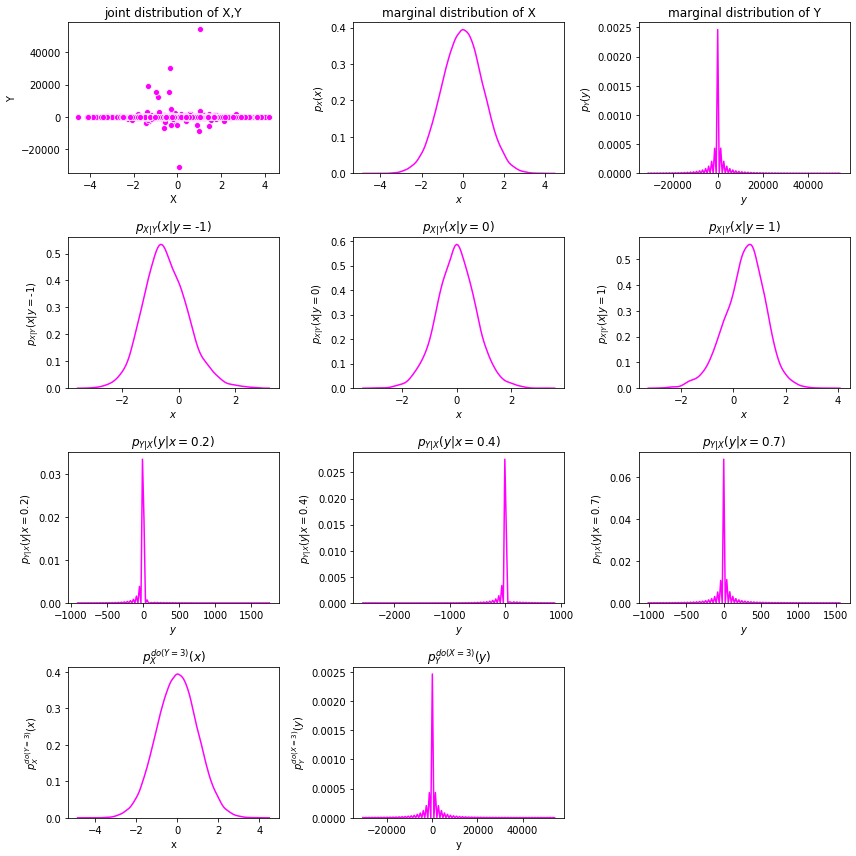

In [6]:
x4, y4 = visualizer('standard_normal', 'standard_t_degree=1', 'B', 10 ** 5,[0.2, 0.4, 0.7],[-1, 0, 1], 0.1, 3, 3, "magenta")

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol start=5>
            <li>
    توضیح:
                <font color=#FF7500 size=4>
                    توضیح این قسمت به مانند قسمت قبل می باشد.
                </font>
            </li>
        </ol>
     </font>
</div>

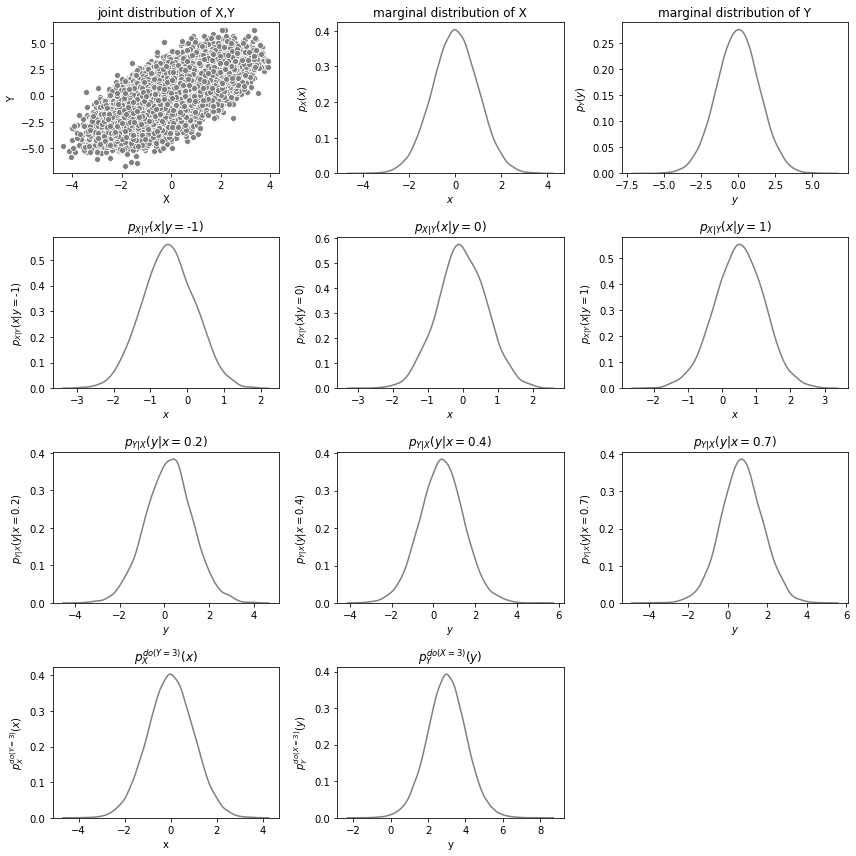

In [7]:
x5, y5 = visualizer('standard_normal', 'standard_t_degree=20', 'B', 10 ** 5,[0.2, 0.4, 0.7],[-1, 0, 1], 0.1, 3, 3, "gray")

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol start=5>
            <li>
توضیح بیشتر راجع به قسمت های ۴و۵:
                <font color=#FF7500 size=4>
همانطور که گفته شد در مدل های خطی تنها زمانی جهت علّی قابل تشخیص نیست که هر دو نویز برونی از توزیع گاوسی باشند.
                    چیزی که در این دو مورد باعث تشخیص سخت تر
                    جهت علّی می شود این است که توزیع
                    $t$
                    شبیه به توزیع گاوسی می باشد
                    .
                    این شباهت با زیاد شدن درجه آزادی توزیع
                    $t$
                    بیشتر هم می شود. که این موضوع خطای ما در تشخیص جهت علّی را بیشتر می کند. در این سوال بدلیل تعداد زیاد داده ها و همچنین توزیع های مداخله ای می توان جهت علی را تشخیص داد.
                </font>
            </li>
        </ol>
     </font>
</div>
<img src="dist.png">

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol start=2>
            <li>
                استنتاج علّیت
            </li>
        </ol>
     </font>
</div>

In [8]:
def regress(x, y, d1 = 2, d2 = 3):
    mmse = 10 ** 100
    bestDegree = 0
        
    for i in range(d1, d2 + 1):
        mymodel = np.poly1d(np.polyfit(x, y, i))
        yhat = mymodel(x)
        err = sum((yhat - y) ** 2)
        if err < mmse:
            mmse = err
            bestDegree = i
    #print(bestDegree)
    mymodel = np.poly1d(np.polyfit(x, y, bestDegree))
    return mymodel(x)

def runAlgorithm(X, Y, d1=2, d2=3):
    yhat = regress(X, Y, d1, d2)
    residual = Y - yhat
    stat, pvalue = Hsic().test(X, residual, 10000)
    ####
    print("X-->Y: ", pvalue)
    xhat = regress(Y, X, d1, d2)
    residualAntiC = X - xhat
    statAntiC, pvalueAntiC = Hsic().test(Y, residualAntiC)
    ####
    print("Y-->X: ", pvalueAntiC)
    if pvalue < pvalueAntiC:
        print("X ---> Y is the anti-causal path")
        return 1
    else:
        print("Y ---> X is the anti-causal path")
        return 0

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        الف)
        <font size=4 color=#FF7500>
            هر ساختار علی به صورت
            $E = f(C) + N_E$
            مدل می شود. این مدل دلیل مرحله ی اول را توضیح می دهد.
            در مرحله ی دوم در واقع نویز برونی معلول،
            $N_E$
            تخمین زده می شود.
            در مدل ارائه شده باید داشته باشیم که
            $N_E$
            و 
            $N_C$
            از هم مستقل هستند
            که این موضوع در مرحله سوم بررسی می شود.
            مرحله چهارم برای بررسی جهت پادعلی به کار می رود و در نهایت 
            جهتی که
            تست استقلال آن 
            $p-value$
            کمتری دارد رد می شود یا به طور معادل به عنوان جهت پادعلی گزارش می شود. چرا که با احتمال کمتری شرط استقلال 
            $N_E$
            و 
            $N_C$
            برای آن برقرار است.
        </font>
    </font>
</div>

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        ب)
        <br />
        <font size=4>
            <ol>
                <li>
                توضیح:
                    <font color=#FF7500>
                        با توجه به اینکه داده ها از مدل غیر خطی می آیند که نویزشان گاوسی هست انتظار داشتیم که الگوریتم بر روی این داده ها خوب عمل کند که همانطور که ملاحظه می شود در هر ده بار اجرا(و حتی در هزار بار اجرا)، جهت پاد علی
                        و در نتیجه جهت علی 
                        درست پیشبینی شده است.
                        (این مدل در سوال آخر تمرین تئوری بررسی شده است.)
                    </font>
                </li>
            </ol>
        </font>
    </font>
</div>

In [9]:
n = 200
e = 0
for _ in range(10):
    Nx = np.random.normal(0, 1, n)
    Ny = np.random.normal(0, 1, n)
    X = Nx
    Y = X ** 3 + X + Ny
    e += runAlgorithm(X, Y)
print('Number of wrong outcomes: ', e)

X-->Y:  1.0
Y-->X:  0.0004081932072461816
Y ---> X is the anti-causal path
X-->Y:  0.3670442075604883
Y-->X:  4.891676056347662e-09
Y ---> X is the anti-causal path
X-->Y:  0.5839110517898921
Y-->X:  2.0475121730967062e-05
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  3.8135516715785896e-10
Y ---> X is the anti-causal path
X-->Y:  0.08301753157797452
Y-->X:  5.694481075309601e-10
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  1.2638532595608012e-07
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  8.965902891388534e-14
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.00016439421088094904
Y ---> X is the anti-causal path
X-->Y:  0.21435582228323258
Y-->X:  4.017512918811706e-06
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  9.41421037809006e-06
Y ---> X is the anti-causal path
Number of wrong outcomes:  0


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <font size=4>
            <ol start=2>
                <li>
                توضیح:
                    <font color=#FF7500>
                           با نگاه کردن به نمودار های برازش شده مشاهده میکنیم که نمودار ها تنها در فواصل دور از صفر بر هم منطبق نیستند بنابراین بسته به نحوه ی قرار گیری نمونه ها با توجه به اینکه تعداد کل نمونه ها نیز کم است الگوریتم محتمل است که خطا کند
                        ،
                        اما همانطور که نتایج الگوریتم نشان میدهد همان تعداد کم نمونه ها در فواصل دور از صفر نیز نیز موجب کاهش تشخیص اشتباه جهت علّی در اکثر موارد می شود.
                    </font>
                </li>
            </ol>
        </font>
    </font>
</div>
<img src="p21.png"></img>

In [10]:
n = 200
e = 0
for _ in range(10):
    Nx = np.random.normal(0, 1, n)
    Ny = np.random.uniform(0, 1, n)
    X = Nx
    Y = X + Ny
    e += runAlgorithm(X, Y)
print('Number of wrong outcomes: ', e)

X-->Y:  0.7130727623421589
Y-->X:  0.34526619515761325
Y ---> X is the anti-causal path
X-->Y:  0.5469376773538317
Y-->X:  0.027396822521999934
Y ---> X is the anti-causal path
X-->Y:  0.3581404961824005
Y-->X:  0.4984834878639187
X ---> Y is the anti-causal path
X-->Y:  1.0
Y-->X:  0.08300885815896879
Y ---> X is the anti-causal path
X-->Y:  0.7539641402056539
Y-->X:  0.6886865284661874
Y ---> X is the anti-causal path
X-->Y:  0.5296231345615947
Y-->X:  0.28761522571389775
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.43741839464213017
Y ---> X is the anti-causal path
X-->Y:  0.6274195483743518
Y-->X:  0.19951603297094336
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.07038167258694335
Y ---> X is the anti-causal path
X-->Y:  0.3191636898159932
Y-->X:  0.02352553183706829
Y ---> X is the anti-causal path
Number of wrong outcomes:  1


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <font size=4>
            <ol start=3>
                <li>
                توضیح:
                    <font color=#FF7500>
                        در این حالت اما بر خلاف حالت قبل دو نمودار برازش شده اصلا شباهتی ندارند و برازش
                        $y = f(x)$
                        برخلاف جهت معکوس
                        دارای باند ثابت می باشد و در نتیجه خطای الگوریتم کمتر از مورد قبلی می باشد.
                        (
                        توجه کنید که این تفاوت در ده بار اجرای الگوریتم ممکن است حس نشود و یا حتی برعکس باشد. اما با افزایش تعداد اجرای الگوریتم ملاحظه می شود که الگوریتم برای این نوع داده اندکی بهتر عمل می کند.
                    </font>
                </li>
            </ol>
        </font>
    </font>
</div>
<img src="p22.png"></img>

In [11]:
n = 200
e = 0
for _ in range(10):
    Nx = np.random.uniform(0, 1, n)
    Ny = np.random.normal(0, 1, n)
    X = Nx
    Y = X + Ny
    e += runAlgorithm(X, Y)
print('Number of wrong outcomes: ', e)

X-->Y:  1.0
Y-->X:  0.49355473173074316
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.0752929995213299
Y ---> X is the anti-causal path
X-->Y:  0.2536169910802461
Y-->X:  0.16838192290443463
Y ---> X is the anti-causal path
X-->Y:  0.6897888500762042
Y-->X:  0.5355274021851604
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.9531922644337991
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.1315008236044105
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.05676477651763168
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.5862768120887454
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.18101907354563512
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  0.31254439913708165
Y ---> X is the anti-causal path
Number of wrong outcomes:  0


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <font size=4>
            <ol start=4>
                <li>
                توضیح:
                    <font color=#FF7500>
                          در این مورد و مورد بعدی چون داده ها از مدل خطی می آیند و نویزآن ها یا گوسی است یا شبیه به گوسی(قبلا توضیح داده شده که توزیع
                        $t$
                        شبیه به توزیع گوسی می باشد و در این جا چون تعداد داده ها کم است می تواند رفتاری به مانند توزیع گوسی داشته باشد
                        .)
                        بنابراین خطا بیشتر از موارد قبلی می باشد.(هرچند که برازش ما به صورت غیرخطی می باشد.)
                    </font>
                </li>
            </ol>
        </font>
    </font>
</div>

In [12]:
n = 200
e = 0
for _ in range(10):
    Nx = np.random.normal(0, 1, n)
    Ny = np.random.standard_t(1, n)
    X = Nx
    Y = X + Ny
    e += runAlgorithm(X, Y, 2, 2)
print('Number of wrong outcomes: ', e)

X-->Y:  1.9295281870568131e-31
Y-->X:  7.337744253766818e-07
X ---> Y is the anti-causal path
X-->Y:  0.42689897459386517
Y-->X:  4.312115176345148e-08
Y ---> X is the anti-causal path
X-->Y:  7.800112619498281e-14
Y-->X:  6.118192370665998e-08
X ---> Y is the anti-causal path
X-->Y:  0.046718834250067905
Y-->X:  2.478421816675482e-10
Y ---> X is the anti-causal path
X-->Y:  2.679519051222507e-07
Y-->X:  2.5744304847387198e-06
X ---> Y is the anti-causal path
X-->Y:  6.367886312711111e-08
Y-->X:  6.25141679386752e-09
Y ---> X is the anti-causal path
X-->Y:  2.6917894230533643e-07
Y-->X:  4.339245504570262e-05
X ---> Y is the anti-causal path
X-->Y:  0.06037078757685771
Y-->X:  3.079784294980926e-05
Y ---> X is the anti-causal path
X-->Y:  3.3198758007445636e-31
Y-->X:  7.448385653530014e-07
X ---> Y is the anti-causal path
X-->Y:  0.003990390604281315
Y-->X:  4.4617844446056666e-07
Y ---> X is the anti-causal path
Number of wrong outcomes:  5


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <font size=4>
            <ol start=5>
                <li>
                توضیح:
                    <font color=#FF7500>
                            به مانند قسمت قبلی.
                    </font>
                </li>
            </ol>
        </font>
    </font>
</div>

In [13]:
n = 200
e = 0
for _ in range(10):
    Nx = np.random.normal(0, 1, n)
    Ny = np.random.standard_t(20, n)
    X = Nx
    Y = X + Ny
    e += runAlgorithm(X, Y, 2, 2)
print('Number of wrong outcomes: ', e)

X-->Y:  0.44359559181541797
Y-->X:  0.23592401727744344
Y ---> X is the anti-causal path
X-->Y:  0.32476170345156763
Y-->X:  0.3241429092026485
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  1.0
Y ---> X is the anti-causal path
X-->Y:  0.6371234615449974
Y-->X:  0.6364432719880107
Y ---> X is the anti-causal path
X-->Y:  1.0
Y-->X:  1.0
Y ---> X is the anti-causal path
X-->Y:  0.8368205171895915
Y-->X:  1.0
X ---> Y is the anti-causal path
X-->Y:  0.2814351987227018
Y-->X:  1.0
X ---> Y is the anti-causal path
X-->Y:  0.1793975562843017
Y-->X:  0.12421172963041709
Y ---> X is the anti-causal path
X-->Y:  0.07295928176584421
Y-->X:  0.1309818770882995
X ---> Y is the anti-causal path
X-->Y:  1.0
Y-->X:  1.0
Y ---> X is the anti-causal path
Number of wrong outcomes:  3


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        پ)
        <font size=4 color=#FF7500>
             با توجه به خروجی الگوریتم نتیجه می گیریم که
            eruption
            علت می باشد.
        </font>
    </font>
</div>

In [14]:
df = pd.read_csv('./faithful.csv')
X = np.array(df['eruptions'])
Y = np.array(df['waiting'])
e = runAlgorithm(X, Y)

X-->Y:  1.0
Y-->X:  0.0020693442543542767
Y ---> X is the anti-causal path


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        ت)
        <font size=4 color=#FF7500>
             در ابتدا الگوریتم را بر روی داده ها اجرا می کنیم. دقت شود که زمان اجرای این قسمت زیاد می باشد.
        </font>
    </font>
</div>

In [15]:
def strFunc(x):
    x = x.replace('\t', " ")
    index = 0
    out = 0
    end = 0
    for i in range(len(x)):
            if (x[i] == ' ') and (index != 1):
                index  = 1
                end = i
            if (index == 1) and (x[i] != ' '):
                out = i
                break
    return [x[:end], x[out:]]

for i in range(1, 109):
    if i in [52, 53, 54, 55, 65, 66, 67, 69, 70, 71, 81, 82, 83, 84, 85, 87, 105]:
        continue
    if i < 10:
        name = 'pair000' + str(i)
        t = pd.read_csv('./pairs/pair000' + str(i) + '.txt')
    elif (i >= 10) and (i < 100):
        name = 'pair00' + str(i)
        t = pd.read_csv('./pairs/pair00' + str(i) + '.txt')
    elif (i >= 100):
        name = 'pair0' + str(i)
        t = pd.read_csv('./pairs/pair0' + str(i) + '.txt')
    x = t[t.columns[0]].apply(strFunc)
    df = pd.DataFrame()
    df["x"] = [float(x[j][0]) for j in range(x.shape[0])]
    df["y"] = [float(x[j][1]) for j in range(x.shape[0])]
    df = df.append({'x':float(strFunc(t.columns[0])[0]), 'y':float(strFunc(t.columns[0])[1])}, ignore_index=True)
    print("For " + name + ':')
    runAlgorithm(np.array(df['x']), np.array(df['y']), 3, 3)
    f = open('./pairs/' + name + "_des.txt", "r")
    for line in f:
        pass    
    last = line        
    print("Correct Causal Path: " + last + '\n')
    f.close()

For pair0001:
X-->Y:  0.014759660382800889
Y-->X:  4.5324982743131305e-08
Y ---> X is the anti-causal path
Correct Causal Path: x --> y

For pair0002:
X-->Y:  4.001721745505327e-08
Y-->X:  1.6419351029721515e-05
X ---> Y is the anti-causal path
Correct Causal Path: x --> y

For pair0003:
X-->Y:  0.029607711641202673
Y-->X:  0.0002068350411790262
Y ---> X is the anti-causal path
Correct Causal Path: x --> y

For pair0004:
X-->Y:  0.023812632634958978
Y-->X:  0.05829896396304183
X ---> Y is the anti-causal path
Correct Causal Path: x --> y

For pair0005:
X-->Y:  9.799851783866022e-14
Y-->X:  2.6315834785363085e-25
Y ---> X is the anti-causal path
Correct Causal Path: x --> y

For pair0006:
X-->Y:  3.7459571100053694e-54
Y-->X:  8.445952964641751e-45
X ---> Y is the anti-causal path
Correct Causal Path: x --> y

For pair0007:
X-->Y:  3.500870518339274e-14
Y-->X:  3.459459210066148e-28
Y ---> X is the anti-causal path
Correct Causal Path: x --> y

For pair0008:
X-->Y:  9.070211681410417e-1

C:\Users\Sajjad\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
C:\Users\Sajjad\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


Correct Causal Path: y-->x

For pair0051:
X-->Y:  0.035448727120966216
Y-->X:  0.0012683844174814045
Y ---> X is the anti-causal path
Correct Causal Path: y-->x

For pair0056:
X-->Y:  0.008754822933968847
Y-->X:  1.2342815399888193e-07
Y ---> X is the anti-causal path
Correct Causal Path: y-->x

For pair0057:
X-->Y:  0.056815310648273686
Y-->X:  1.194375378762517e-05
Y ---> X is the anti-causal path
Correct Causal Path: y-->x

For pair0058:
X-->Y:  0.021913009779666547
Y-->X:  5.169379978315152e-05
Y ---> X is the anti-causal path
Correct Causal Path: y-->x

For pair0059:
X-->Y:  0.02002335222267448
Y-->X:  2.671347951719175e-05
Y ---> X is the anti-causal path
Correct Causal Path: y-->x

For pair0060:
X-->Y:  0.017433212290715518
Y-->X:  9.191124154086048e-05
Y ---> X is the anti-causal path
Correct Causal Path: y-->x

For pair0061:
X-->Y:  0.0625090396862369
Y-->X:  0.0006669752464787699
Y ---> X is the anti-causal path
Correct Causal Path: y-->x

For pair0062:
X-->Y:  0.018598135526

C:\Users\Sajjad\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned
C:\Users\Sajjad\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <font size=4 color=#FF7500>
                    حال به بررسی نمودار داده های ششم که یکی از مواردی است که الگوریتم اشتباه کرده است می پردازیم:
            <br />
            همانطور که از نمودار ها ملاحظه می شود
            با افزایش 
            x
            مقدار نویز 
            y
            افزایش می یابد، در حالت ضد علی نیز همین اتفاق رخ می دهد.
            و در نتیجه در هر دو حالت علّی و 
            ضد علّی نویز برونی علّت و معلول در هر دو مسیر وابسته اند که علت خطای الگوریتم نیز می تواند همین موضوع باشد.
        </font>
    </font>
</div>

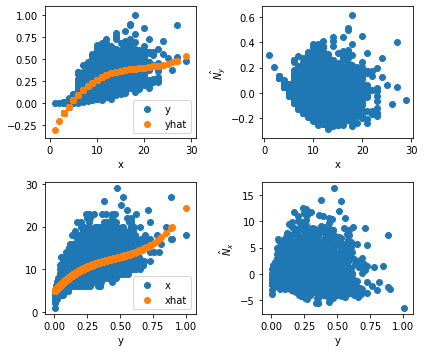

In [16]:
t = pd.read_csv('./pairs/pair000' + str(6) + '.txt')
x = t[t.columns[0]].apply(strFunc)
df = pd.DataFrame()
df["x"] = [float(x[j][0]) for j in range(x.shape[0])]
df["y"] = [float(x[j][1]) for j in range(x.shape[0])]
df = df.append({'x':float(strFunc(t.columns[0])[0]), 'y':float(strFunc(t.columns[0])[1])}, ignore_index=True)
plt.figure(figsize=(6, 5))

plt.subplot(2, 2, 1)
plt.scatter(df["x"], df["y"], label='y')
plt.scatter(df["x"], regress(np.array(df["x"]), np.array(df["y"]), 3, 3), label='yhat')
plt.xlabel("x")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df["x"], df["y"] - regress(np.array(df["x"]), np.array(df["y"]), 3, 3))
plt.xlabel("x")
plt.ylabel("$\hat{N_y}$")

plt.subplot(2, 2, 3)
plt.scatter(df["y"], df["x"], label="x")
plt.scatter(df["y"], regress(np.array(df["y"]), np.array(df["x"]), 3, 3), label="xhat")
plt.xlabel("y")
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(df["y"], df["x"] - regress(np.array(df["y"]), np.array(df["x"]), 3, 3))
plt.xlabel("y")
plt.ylabel("$\hat{N}_x$")

plt.tight_layout()

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <font size=4 color=#FF7500>
        اما با بررسی همین موضوع برای جفت داده زیر که جهت علّی برای آن ها درست پیشبینی شده است  
            می بینیم که تنها در حالت
            $x --> y$
            نویز ها وابسته هستند و در حالت 
            $y --> x$
            تقریبا رابطه ای بین نویز ها نیست.
        </font>
    </font>
</div>

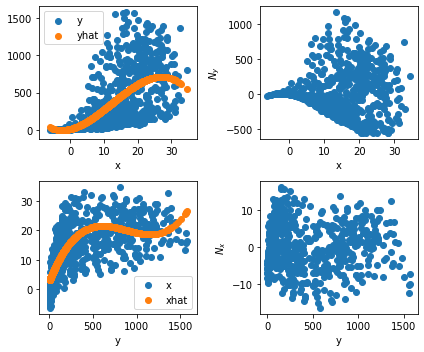

In [17]:
t = pd.read_csv('./pairs/pair00' + str(80) + '.txt')
x = t[t.columns[0]].apply(strFunc)
df = pd.DataFrame()
df["x"] = [float(x[j][0]) for j in range(x.shape[0])]
df["y"] = [float(x[j][1]) for j in range(x.shape[0])]
df = df.append({'x':float(strFunc(t.columns[0])[0]), 'y':float(strFunc(t.columns[0])[1])}, ignore_index=True)
plt.figure(figsize=(6, 5))

plt.subplot(2, 2, 1)
plt.scatter(df["x"], df["y"], label='y')
plt.scatter(df["x"], regress(np.array(df["x"]), np.array(df["y"]), 3, 3), label='yhat')
plt.xlabel("x")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df["x"], df["y"] - regress(np.array(df["x"]), np.array(df["y"]), 3, 3))
plt.xlabel("x")
plt.ylabel("$N_y$")

plt.subplot(2, 2, 3)
plt.scatter(df["y"], df["x"], label="x")
plt.scatter(df["y"], regress(np.array(df["y"]), np.array(df["x"]), 3, 3), label="xhat")
plt.xlabel("y")
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(df["y"], df["x"] - regress(np.array(df["y"]), np.array(df["x"]), 3, 3))
plt.xlabel("y")
plt.ylabel("$N_x$")

plt.tight_layout()

<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        <ol start=3>
            <li>
                تشخیص جهت علّی
            </li>
        </ol>
     </font>
</div>

In [18]:
t = pd.read_csv('Data.txt')
x = t[t.columns[0]].apply(lambda x: x.split(' '))
df = pd.DataFrame()
df["x"] = [float(x[i][1]) for i in range(t.shape[0])]
df["y"] = [float(x[i][2]) for i in range(t.shape[0])]
df["z"] = [float(x[i][3]) for i in range(t.shape[0])]
df["w"] = [float(x[i][4]) for i in range(t.shape[0])]

In [19]:
def visu(x, y, n, xgiven, ygiven, e, c = "blue"):
    
    fig = plt.figure(figsize=(12,12))
    
    plt.subplot(4, 3, 1)
    sns.scatterplot(x=x, y=y, color=c)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('joint distribution of X,Y')
    
    
    plt.subplot(4, 3, 2)
    sns.distplot(x, hist=False, kde=True, 
                 bins=int(180/5), color = c,
                 hist_kws={'edgecolor':'black'})
    plt.xlabel('$x$')
    plt.ylabel('$p_X(x)$')
    plt.title('marginal distribution of X')
    
    
    plt.subplot(4, 3, 3)
    sns.distplot(y, hist=False, kde=True, 
                 bins=int(180/5), color = c,
                 hist_kws={'edgecolor':'black'})
    plt.xlabel('$y$')
    plt.ylabel('$p_Y(y)$')
    plt.title('marginal distribution of Y')
    
    
    for i in range(len(ygiven)):
        temp = np.ones((n, 1))
        temp[ y.reshape((n, 1)) > (ygiven[i] + e)] = 0
        temp[ y.reshape((n, 1)) < (ygiven[i] - e)] = 0
        temp = x.reshape((n, 1))[temp == 1]
        plt.subplot(4, 3, i + 4)
        sns.distplot(temp, hist=False, kde=True, 
                     bins=int(180/5), color = c,
                     hist_kws={'edgecolor':'black'})
        # Add labels
        plt.title('$p_{X|Y}(x|y =$' + str(ygiven[i]) + ")")
        plt.ylabel('$p_{X|Y}(x|y =$' + str(ygiven[i]) + ")")
        plt.xlabel('$x$')
        
        
    for i in range(len(xgiven)):
        temp = np.ones((n, 1))
        temp[x.reshape((n, 1)) > (xgiven[i] + e)] = 0
        temp[x.reshape((n, 1)) < (xgiven[i] - e)] = 0
        temp = y.reshape((n, 1))[temp == 1]
        plt.subplot(4, 3, i + 7)
        sns.distplot(temp, hist=False, kde=True, 
                     bins=int(180/5), color = c,
                     hist_kws={'edgecolor':'black'})
        # Add labels
        plt.title('$p_{Y|X}(y|x =$' + str(xgiven[i]) + ")")
        plt.ylabel('$p_{Y|X}(y|x =$' + str(xgiven[i]) + ")")
        plt.xlabel('$y$')
    plt.tight_layout()

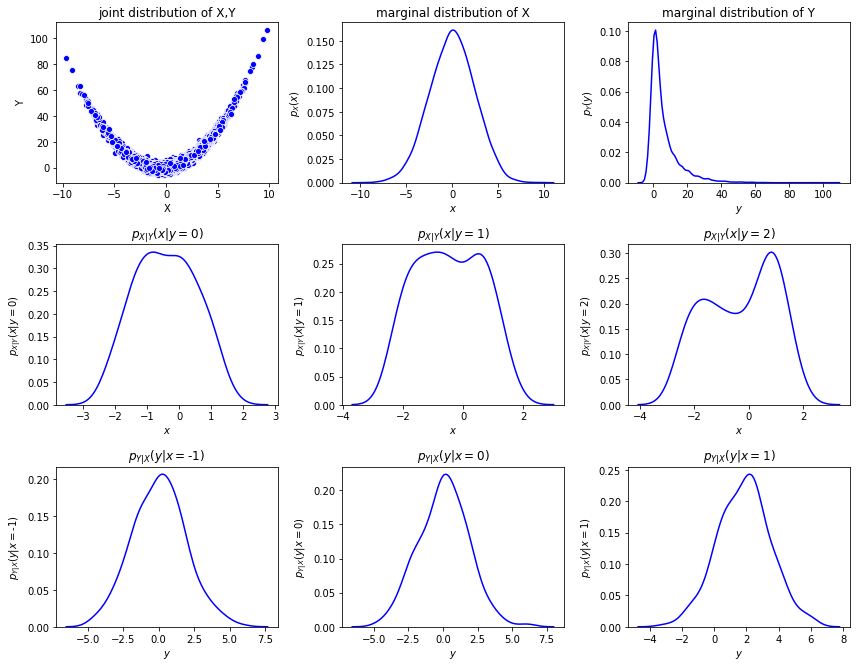

In [20]:
visu(np.array(df["x"].copy()), np.array(df["y"].copy()), df.shape[0], [-1, 0, 1], [0, 1, 2], 0.1)

In [21]:
t = runAlgorithm(np.array(df["x"].copy()), np.array(df["y"].copy()))

X-->Y:  0.7589802921548561
Y-->X:  0.0
Y ---> X is the anti-causal path


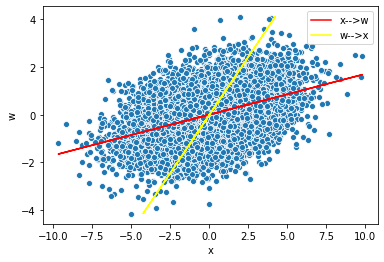

In [22]:
# visu(np.array(df["x"].copy()), np.array(df["w"].copy()), df.shape[0], [-1, 0, 1], [0, 1, 2], 0.1)
# print("NOTE: In the plots below, x = x and y = w\n\n")
plt.figure()
sns.scatterplot(df["x"], df["w"])
plt.plot(df["x"], regress(df["x"], df["w"], 1, 1), color="red", label="x-->w")
plt.plot(regress(df["w"], df["x"], 1, 1), df["w"], color="yellow", label="w-->x")
plt.legend()

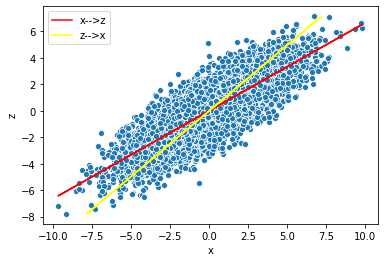

In [23]:
#visu(np.array(df["x"].copy()), np.array(df["z"].copy()), df.shape[0], [-1, 0, 1], [0, 1, 2], 0.1)
#print("NOTE: In the plots below, x = x and y = z\n\n")
plt.figure()
sns.scatterplot(df["x"], df["z"])
plt.plot(df["x"], regress(df["x"], df["z"], 1, 1), color="red", label="x-->z")
plt.plot(regress(df["z"], df["x"], 1, 1), df["z"], color="yellow", label="z-->x")
plt.legend()

NOTE: In the plots below, x = y and y = z




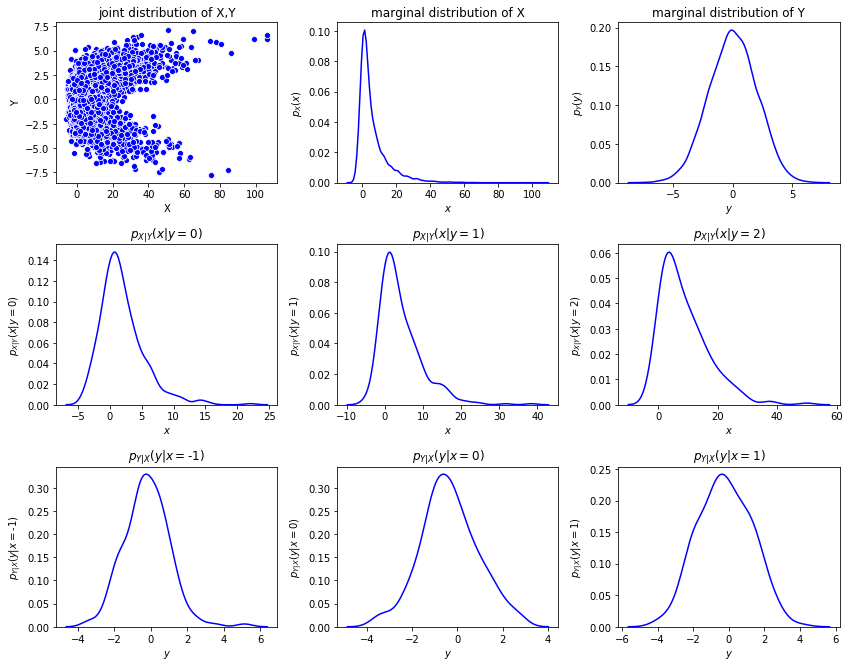

In [24]:
visu(np.array(df["y"].copy()), np.array(df["z"].copy()), df.shape[0], [-1, 0, 1], [0, 1, 2], 0.1)
print("NOTE: In the plots below, x = y and y = z\n\n")

In [25]:
print("Note: Here x = y, y = z\n\n")
t = runAlgorithm(np.array(df["y"].copy()), np.array(df["z"].copy()))

Note: Here x = y, y = z


X-->Y:  1.8189509923072427e-224
Y-->X:  1.9589522832402886e-170
X ---> Y is the anti-causal path


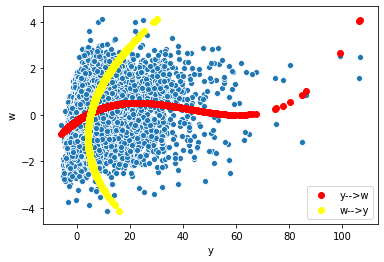

In [26]:
# visu(np.array(df["y"].copy()), np.array(df["w"].copy()), df.shape[0], [0, 5, 10], [0, 2, -2], 0.1)
# print("NOTE: In the plots below, x = y and y = w\n\n")
plt.figure()
sns.scatterplot(df["y"], df["w"])
plt.scatter(df["y"], regress(df["y"], df["w"], 2, 3), color="red", label="y-->w")
plt.scatter(regress(df["w"], df["y"], 2, 3), df["w"], color="yellow", label="w-->y")
plt.legend()

In [27]:
print("Note: Here x = y, y = w\n\n")
t = runAlgorithm(np.array(df["y"].copy()), np.array(df["w"].copy()))

Note: Here x = y, y = w


X-->Y:  3.8427504694705295e-40
Y-->X:  2.511510283596806e-60
Y ---> X is the anti-causal path


<div align=right style="direction:rtl">
    <font face="XB Niloofar" size=5>
        توضیح:
        <font size=4 color=#FF7500>
        برای
           $x$
            ,
            $y$
            نتایج به وضوح نشان میدهند که
            $x\rightarrow y$
            .
            برای
            $x$
            ,
            $w$
            و
            $x$
            , 
            $z$
            طبق استدلال داشتن ساپورت یکسان
            مسیر های علی به شکل
            $x\rightarrow w$
            و
            $x \rightarrow z$
            می باشد.
            برای 
            $y$
            ,
            $z$
            نیز می توان گفت 
            $z\rightarrow y$
            چرا که تابع 
            $y = z^2 + n_y$
            به نظر رابطه ی علّی را مدل می کند.
            در مورد
            $y$
            و 
            $w$
            علیت 
            خیلی مشهود نیست ولی به نظر
            به شکل
            $y\rightarrow w$
            می باشد.
            در نهایت می توان گراف علّی را به شکل زیر حدس زد:
        </font>
    </font>
</div>
<img src="graph.png"></img>